
**Autor: Mateusz Chojnowski**

Napisz program wyznaczający sumy szeregów $S^{(a)} =\sum_{n=1}^{N}\frac{1}{n}$ oraz $S^{(b)} =\sum_{n=N}^{1}\frac{1}{n}$ 
Wyprowadź wyniki do pliku i wykreśl zależność $(S^{(a)} − S^{(dokl)})/S^{(dokl)}$ i $(S^{(b)} − S^{(dokl)})/S^{(dokl)}$ od N. Rachunki przeprowadź w pojedynczej i podwójnej precyzji wykorzystując obliczenia w podwójnej precyzji jako wartości dokładne.

In [1]:
from IPython.core.display import HTML
with open('custom.css', 'r') as f:
    HTML(f.read())

# Program

```c
#include <stdio.h>
#include <float.h>
#include <string.h>
#include <libgen.h>

double sum_double_up(int n)
{
    double sum = 0;
    for (int i = 1; i <= n; ++i)
        sum += 1.0 / i;

    return sum;
}

double sum_double_down(int n)
{
    double sum = 0;
    for(int i = n; i >= 1; --i)
        sum += 1.0 / i;
    return sum;
}

float sum_float_up(int n)
{
    float sum = 0;
    for (int i = 1; i <= n; ++i)
        sum += 1.0f / i;
    return sum;
}

float sum_float_down(int n)
{
    float sum = 0;
    for (int i = n; i >= 1; --i)
        sum += 1.0f / i;
    return sum;
}

int main() {
    FILE *file;
    const int MAX_N = 1000000000;
    const int STEP_N = 10;
    int n = 1;
    float result_up, result_down;
    double dresult_up, dresult_down;
    char *path = strdup(__FILE__);
    path = dirname(path);
    strcat(path, "/sum.csv");
    file = fopen(path, "w");
    fprintf(file, "n,sum_float_up,sum_float_down,sum_double_up,sum_double_down\n");
    while(n < MAX_N)
    {
        result_up = sum_float_up(n);
        result_down = sum_float_down(n);
        dresult_up = sum_double_up(n);
        dresult_down = sum_double_down(n);
        fprintf(file, "%i,%.*f,%.*f,%.*f,%.*f\n", n, FLT_DIG, result_up, FLT_DIG, 
                result_down, DBL_DIG, dresult_up, DBL_DIG, dresult_down);
        n *= STEP_N;
    }
    fclose(file);
    return 0;
}


```


Wartość sumy szeregu zostały obliczone dla $n = 10^x, x = [0, 1, ..., 7, 8]$ 

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
plt.rcParams["figure.figsize"] = (20,10)

# Zawartość pliku sum.csv

In [3]:
df = pd.read_csv('sum.csv')
df

,n,sum_float_up,sum_float_down,sum_double_up,sum_double_down
0,1,1.000000,1.000000,1.000000,1.000000
1,10,2.928968,2.928968,2.928968,2.928968
2,100,5.187378,5.187377,5.187378,5.187378
3,1000,7.485478,7.485472,7.485471,7.485471
4,10000,9.787613,9.787604,9.787606,9.787606
5,100000,12.090851,12.090152,12.090146,12.090146
6,1000000,14.357358,14.392652,14.392727,14.392727
7,10000000,15.403683,16.686031,16.695311,16.695311
8,100000000,15.403683,18.807919,18.997896,18.997896


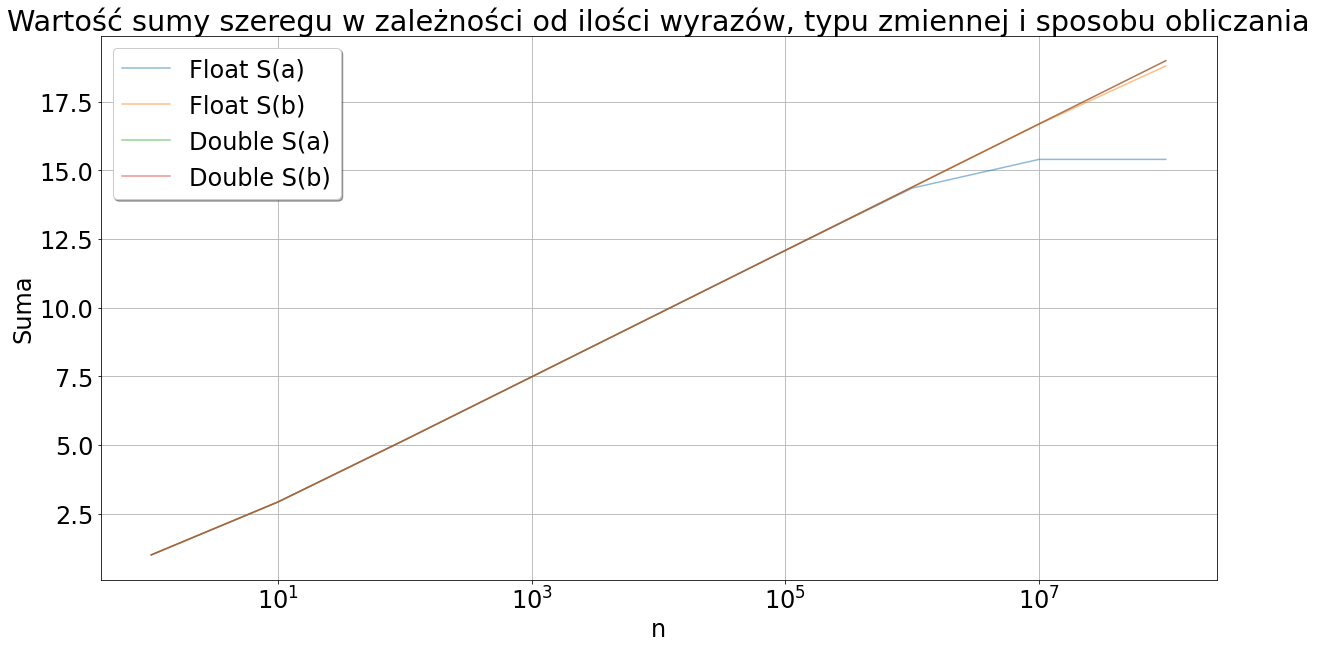

In [8]:
plt.rcParams['font.size'] = '24'
fig, axes = plt.subplots()
axes.plot(df['n'], df['sum_float_up'], label='Float S(a)', alpha=.5)
axes.plot(df['n'], df['sum_float_down'], label='Float S(b)', alpha=.5)
axes.plot(df['n'], df['sum_double_up'], label='Double S(a)', alpha=.5)
axes.plot(df['n'], df['sum_double_down'], label='Double S(b)', alpha=.5)
# plt.plot(df['n'], df.loc[:, df.columns != 'n'], alpha=.5)
legend = axes.legend(loc='best', shadow=True)
plt.xscale('log')
plt.ylabel('Suma')
plt.xlabel('n')
plt.title("Wartość sumy szeregu w zależności od ilości wyrazów, typu zmiennej i sposobu obliczania")
plt.grid(True)
plt.show()

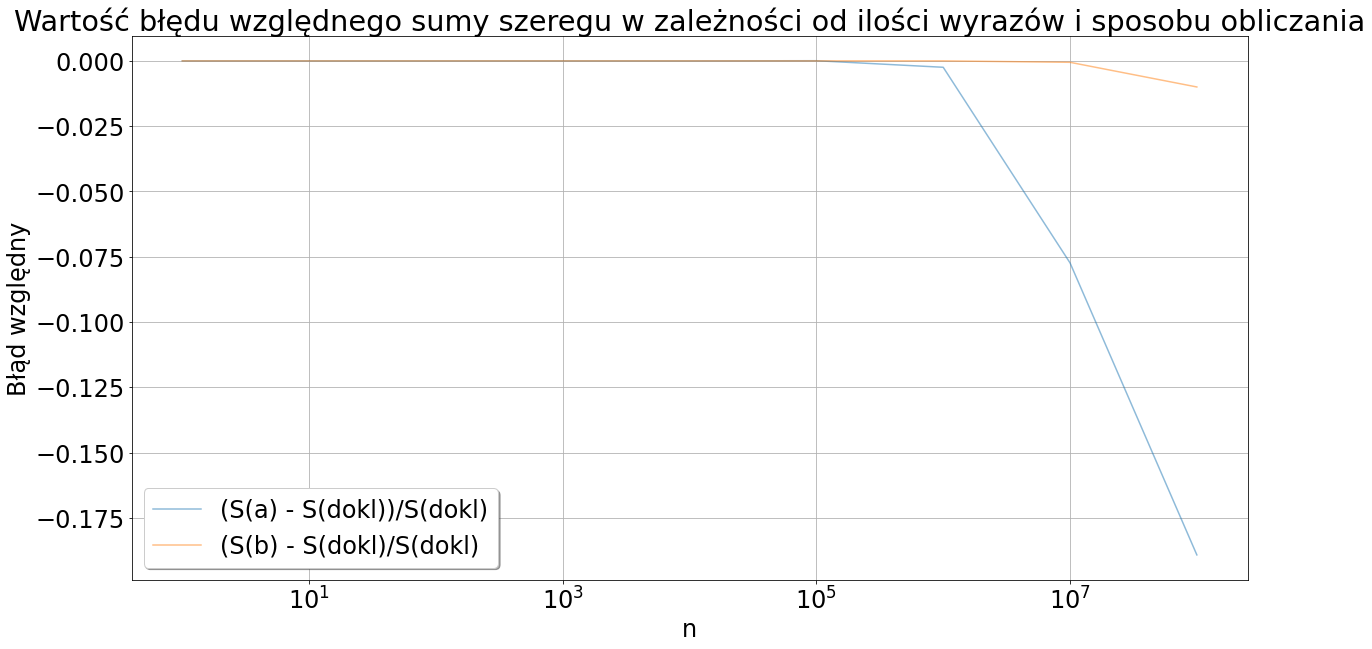

In [9]:
df['error_a'] = (df['sum_float_up'] - df['sum_double_up']) / df['sum_double_up']
df['error_b'] = (df['sum_float_down'] - df['sum_double_down']) / df['sum_double_down']
fig, axes = plt.subplots()
axes.plot(df['n'], df['error_a'], label='(S(a) - S(dokl))/S(dokl)', alpha=.5)
axes.plot(df['n'], df['error_b'], label='(S(b) - S(dokl)/S(dokl)', alpha=.5)
legend = axes.legend(loc='best', shadow=True)
plt.xscale('log')
plt.ylabel('Błąd względny')
plt.xlabel('n')
plt.title("Wartość błędu względnego sumy szeregu w zależności od ilości wyrazów i sposobu obliczania")
plt.grid(True)
plt.show()

# Wnioski
1. Dla $n > 10^5$ na wynik operacji zaczyna mieć wpływ wielkość typu zmiennej przechowującej częściowe wyniki operacji w przypadku sumowania od największego wyrazu szeregu do najmniejszego. Dla $n > 10^6$ różnica w wyniku uzyskanym z wykorzystaniem zmiennych typu `float` i zmiennej typu `double` nie jest zaniedbywalna.
2. Dla $n > 10^7$ suma szeregu liczona od najmniejszego wyrazu zaczyna istotnie różnić się w zależności od precyzji wykorzystanych w obliczeniach zmiennych.
3. Różnica w rozbieżności wyników w zależności od sposobu liczenia wartości sumy szeregu wynika z pojemności typu - jeżeli sumowanie rozpoczęte jest od największych wartości (n początkowe = 1) to podczas sumowania końcowych elementów szeregu ich wartość są tak małe, że podczas ich dodawania obcinana jest część liczby a uzyskana w ten sposób liczba ma wartość 0.